# Introduction

In the previous notebook we prepared data for training our model. In this notebook we will create our model, then train the model and then evaluate it.

# Importing the data

We have already our data in the previous section in this section we will just download the data and decompress them. All the files used in this notebook are stored as publicly downloadable file.

## Downloading data.

In [1]:
# Download clean images
!gdown https://drive.google.com/uc?id=1-CNOtMEBdZna6m5fB9WOjXyGqAcMyor9

Downloading...
From: https://drive.google.com/uc?id=1-CNOtMEBdZna6m5fB9WOjXyGqAcMyor9
To: /content/testSetPlaces205_resize.tar.gz
2.34GB [00:29, 78.5MB/s]


In [2]:
# Download dirty images
!gdown https://drive.google.com/uc?id=1svg85MYow-kaOLk0Z_W4GS3LwShDrg2C

Downloading...
From: https://drive.google.com/uc?id=1svg85MYow-kaOLk0Z_W4GS3LwShDrg2C
To: /content/dirty_images.zip
1.51GB [00:36, 41.6MB/s]


## Decompressing data.

In [3]:
# decompressing the clean image file.
!gunzip < testSetPlaces205_resize.tar.gz | tar xvf -

# reanaming the directory.
!mv /content/testSet_resize /content/clean_images

Streaming output truncated to the last 5000 lines.
testSet_resize/712ea6cb3dc50fe0c0347463fc75d982.jpg
testSet_resize/dc8e50e5da86efca5626c2b1293cf417.jpg
testSet_resize/edc507bd0f86896330ad78d852a061b8.jpg
testSet_resize/1fe7a8e5f31789be5be02e5cf90ec71f.jpg
testSet_resize/c910500304c0fa99308d732ea64dabb8.jpg
testSet_resize/c6535e94249c2bf1f7977d55c85a5eeb.jpg
testSet_resize/84f088f6d570b59a5db74f5bb8a0c355.jpg
testSet_resize/0e24f4e807c3b1d6e97b515055ca707f.jpg
testSet_resize/702f3ff21ee7a9c2e4fb7b5381e58ca1.jpg
testSet_resize/b818081ad792334cc82cc9b29d120aca.jpg
testSet_resize/91c5154a5d56948f400aea8b1f80fdc4.jpg
testSet_resize/ba74736e1c1bde9c30daec2589841369.jpg
testSet_resize/3d4a64ea696e36f44f0770099ad1f66a.jpg
testSet_resize/4d2431e8db9afaf7d242b9f4f8409b40.jpg
testSet_resize/21e0fc30efce4e443e6f8d4bc9e0e0a8.jpg
testSet_resize/f7e53fe79f7621e882833f72c907489f.jpg
testSet_resize/5333714bb4cc901a586e279788749062.jpg
testSet_resize/47af00700da01b86e79fdff27a8c7ed7.jpg
testSet_resiz

In [4]:
# decompressing dirty image file
!unzip dirty_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dirty_images/e38ac54927e7f3017ef01774e5a2e579.jpg  
  inflating: dirty_images/dcdba5ee4521fc205121b905fba66033.jpg  
  inflating: dirty_images/97659404cc7caee367655ee04ab9b241.jpg  
  inflating: dirty_images/fd2dd7a56e67bb6cb125e0516e50d2d2.jpg  
  inflating: dirty_images/b567ba7d637327be7d40313b2b8f391a.jpg  
  inflating: dirty_images/6e7dc3c7d69030904c599b5f2c8c342e.jpg  
  inflating: dirty_images/2719de7bdd886279442f720404e9177d.jpg  
  inflating: dirty_images/44e96d3ea746130392d948af012de0f3.jpg  
  inflating: dirty_images/97fbf795be8d1c0835c903cfd49a75e2.jpg  
  inflating: dirty_images/1f71b4200a2654ea45b87d1183a7cdf4.jpg  
  inflating: dirty_images/e98ff3917d0a563c35259defda4161c4.jpg  
  inflating: dirty_images/bc1b46181003974a8a38722c07e5c98b.jpg  
  inflating: dirty_images/d6b1f83a9f969010b4cb08a9e8876b6e.jpg  
  inflating: dirty_images/1519deeda6be2e5248e86b82c50378de.jpg  
  inflating: dirty_images/dae37665efe85

# Creating a CNN auto encoder model.




In [5]:
# importing essential libraries.

import os
import cv2
import osgeo
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from IPython.display import clear_output
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose

## Defining model

In [6]:
input = layers.Input(shape=(256, 256, 3), name="Input")                               #(256,256,3)

conv1 = layers.Conv2D(64, (4, 4), activation='relu', strides=2,name="Conv01",padding="same")(input)  #(128,128,64)
conv2 = layers.Conv2D(64, (4, 4), activation='relu', strides=2,name="Conv02",padding="same")(conv1)  #(64,64,64)
conv3 = layers.Conv2D(128, (4, 4), activation='relu', strides=2,name="Conv03",padding="same")(conv2) #(32,32,128)
conv4 = layers.Conv2D(256, (4, 4), activation='relu', strides=2,name="Conv04",padding="same")(conv3) #(16,16,256)
conv5 = layers.Conv2D(512, (4, 4), activation='relu', strides=2,name="Conv05",padding="same")(conv4) #(8,8,512)
conv6 = layers.Conv2D(512, (4, 4), activation='relu', strides=2,name="Conv06",padding="same")(conv5) #(4,4,512)
conv7 = layers.Conv2D(512, (4, 4), activation='relu', strides=2,name="Conv07",padding="same")(conv6) #(2,2,512)
conv8 = layers.Conv2D(512, (4, 4), activation='relu', strides=2,name="Conv08",padding="same")(conv7) #(1,1,512)

deconv1 = layers.Conv2DTranspose(512, (4,4), activation='relu', strides=2,name="DeConv01",padding='same')(conv8)#(4, 4, 512)

skip2 = layers.Add()([deconv1, conv7])
deconv2 = layers.Conv2DTranspose(512, (4,4), activation='relu', strides=2,padding="same",name="DeConv02")(skip2) #(4, 4, 512)

skip3 = layers.Add()([deconv2, conv6])
deconv3 = layers.Conv2DTranspose(512, (4,4), activation='relu', strides=2,padding="same",name="DeConv03")(skip3) #(32, 32, 128)

skip4 = layers.Add()([deconv3, conv5])
deconv4 = layers.Conv2DTranspose(256, (4,4), activation='relu', strides=2,padding="same",name="DeConv04")(skip4)#(8, 8, 256)

skip5 = layers.Add()([deconv4, conv4])
deconv5 = layers.Conv2DTranspose(128, (4,4), activation='relu', strides=2,padding="same",name="DeConv05")(skip5)

skip6 = layers.Add()([deconv5, conv3])
deconv6 = layers.Conv2DTranspose(64, (4,4), activation='relu', strides=2,padding="same",name="DeConv06")(skip6)

skip7 = layers.Add()([deconv6, conv2])
deconv7 = layers.Conv2DTranspose(64, (4,4), activation='relu', strides=2,padding="same",name="DeConv07")(skip7)

skip8 = layers.Add()([deconv7, conv1])
deconv8 = layers.Conv2DTranspose(64, (4,4), activation='relu',strides=2, padding="same",name="DeConv08")(deconv7)

output = layers.Conv2D(3, (4, 4), activation='relu',name="output",padding="same")(deconv8)

## Compiling the model

In [7]:

AE = Model(input, output)
AE.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
AE.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv01 (Conv2D)                 (None, 128, 128, 64) 3136        Input[0][0]                      
__________________________________________________________________________________________________
Conv02 (Conv2D)                 (None, 64, 64, 64)   65600       Conv01[0][0]                     
__________________________________________________________________________________________________
Conv03 (Conv2D)                 (None, 32, 32, 128)  131200      Conv02[0][0]                     
______________________________________________________________________________________________

# Loading images into numpy array.

Since, the model cannot take image files as direct input for training the model we need to convert image into numpy array.

We could have also used **tf.keras.preprocessing.image_dataset_from_directory** function. But this function creates y labels from directory name but in autoencoders case, the y label should also be an image. We were unable to oveeride this method so we were stuck with numpy.


We also experimented with **tf.io.read_file** to create custom data input pipeline but could not write efficient data input pipeline.

## Reading images as numpy arrays.

In [8]:
# run this cell to read images into numpy arrays.

DATA_SIZE = 5000
CLEAN_IMAGES = "/content/clean_images"
DIRTY_IMAGES = "/content/dirty_images"

# array to store images
clean_images = []
dirty_images = []


count = 0;
for filename in os.listdir(CLEAN_IMAGES):
  count = count+1
  if (count <= DATA_SIZE ):
    print("Processing image " + str(count) + " out of 5000 clean images.")
    clear_output(wait=True)
    img = image.load_img(os.path.join(CLEAN_IMAGES,filename), target_size=(256, 256))
    clean_images.append(image.img_to_array(img))
  else:
    break

# Create numpy array from images data
clean_images = np.array(clean_images, dtype=np.uint16)

count = 0;
for filename in os.listdir(DIRTY_IMAGES):
  count = count+1
  if (count <= DATA_SIZE ):
    print("Processing image " + str(count) + " out of 5000 dirty images.")
    clear_output(wait=True)
    img = image.load_img(os.path.join(DIRTY_IMAGES,filename), target_size=(256, 256))
    dirty_images.append(image.img_to_array(img))
  else:
    break
# Create numpy array from images data
dirty_images = np.array(dirty_images, dtype=np.uint16)

Processing image 5000 out of 5000 dirty images.


In [9]:
print("Shape of clean_images: ", clean_images.shape)
print("Size of clean_images: ", clean_images.nbytes)
print("Shape of dirty_images: ", dirty_images.shape)
print("Size of dirty_images: ", dirty_images.nbytes)

Shape of clean_images:  (5000, 256, 256, 3)
Size of clean_images:  1966080000
Shape of dirty_images:  (5000, 256, 256, 3)
Size of dirty_images:  1966080000


In [10]:
# This is just a method to view images in numpy array

# https://www.kaggle.com/orion99/autoencoder-made-easy
def show_image_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

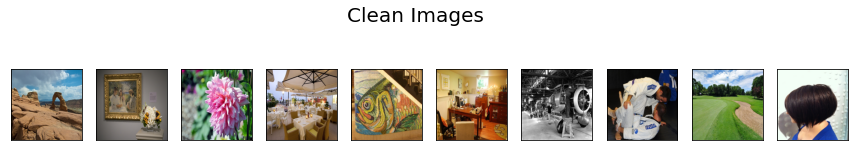

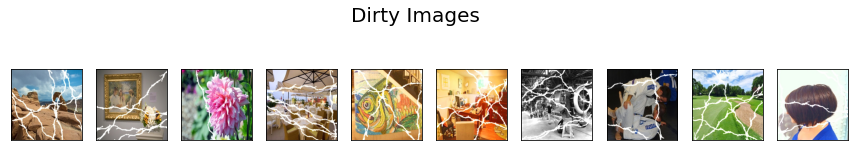

In [11]:
show_image_data(clean_images, title="Clean Images")
show_image_data(dirty_images, title="Dirty Images")

## Splitting the numpy arrays for training and validation.

In [12]:
train_clean_image = clean_images[:4000]
train_dirty_image = dirty_images[:4000]
val_clean_image = clean_images[4000:4500]
val_dirty_image = dirty_images[4000:4500]
test_clean_image = clean_images[4500:]
test_dirty_image = dirty_images[4500:]
print("train_clean_image", train_clean_image.shape)
print("train_dirty_image", train_dirty_image.shape)
print("val_clean_image", test_clean_image.shape)
print("val_dirty_image", test_dirty_image.shape)
print("test_clean_image", test_clean_image.shape)
print("test_dirty_image", test_dirty_image.shape)

train_clean_image (4000, 256, 256, 3)
train_dirty_image (4000, 256, 256, 3)
val_clean_image (500, 256, 256, 3)
val_dirty_image (500, 256, 256, 3)
test_clean_image (500, 256, 256, 3)
test_dirty_image (500, 256, 256, 3)


# Training the model.



In [13]:
AE.fit(train_dirty_image, 
       train_clean_image,
       epochs=10,
       shuffle=True,
       validation_data=(val_dirty_image, val_clean_image))

Epoch 1/10
125/125 [==============================] - 92s 435ms/step - loss: 2164581.9011 - accuracy: 0.4235 - val_loss: 13147.7500 - val_accuracy: 0.3190
Epoch 2/10
125/125 [==============================] - 54s 433ms/step - loss: 13508.9366 - accuracy: 0.3202 - val_loss: 13033.7314 - val_accuracy: 0.3192
Epoch 3/10
125/125 [==============================] - 55s 444ms/step - loss: 13504.2480 - accuracy: 0.3194 - val_loss: 12981.9248 - val_accuracy: 0.3197
Epoch 4/10
125/125 [==============================] - 56s 452ms/step - loss: 13391.6914 - accuracy: 0.3184 - val_loss: 12944.1904 - val_accuracy: 0.3202
Epoch 5/10
125/125 [==============================] - 57s 453ms/step - loss: 13253.2324 - accuracy: 0.3299 - val_loss: 11616.4414 - val_accuracy: 0.4157
Epoch 6/10
125/125 [==============================] - 57s 453ms/step - loss: 12112.2495 - accuracy: 0.4171 - val_loss: 11574.9648 - val_accuracy: 0.4288
Epoch 7/10
125/125 [==============================] - 57s 454ms/step - loss: 118

# Viewing results.

In this section we will use the trained model to restore dirty image in our **test_dirty_image** array.

In [14]:
reconstructed_images = AE.predict(test_dirty_image)

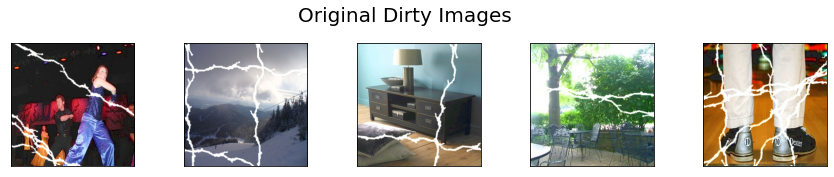

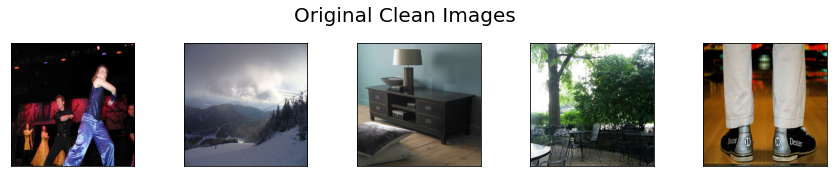

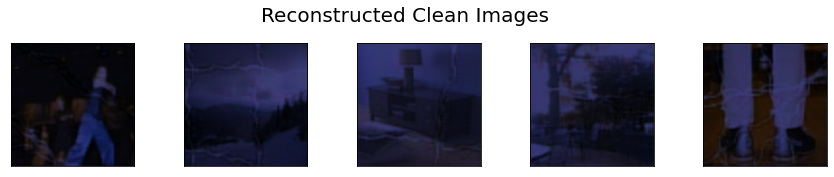

In [15]:
show_image_data(test_dirty_image, title="Original Dirty Images",n=5)
show_image_data(test_clean_image, title="Original Clean Images",n=5)
show_image_data(reconstructed_images, title="Reconstructed Clean Images",n=5)

# Saving and downloading model.

We have successfully trained our model to restore images. Now, we can deploy this model to create an web application that can restore images. So, we should save our model to deploy it in web application.

In [18]:
# save model
# we will be saving our models in both formats.
# AE.save('mymodel')

In [19]:
# AE.save('model.h5')

Now you can download these files from Google colab files explorer.

In [20]:
# !zip -r mymodel.zip mymodel